<a href="https://colab.research.google.com/github/nonowdotid9/dashboard_bdb/blob/main/DemamBerdarah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# dataset
file_path = 'DATA DBD.csv'
import pandas as pd # Import pandas here to ensure it's available in this cell's scope
data = pd.read_csv(file_path)

In [5]:
# Pra-pemrosesan Data
# Memastikan semua kolom sesuai dataset
# Mengubah nama kolom agar sesuai jika diperlukan
data.rename(columns={
    'Gejalah': 'Gejala',
    'Durasi Gejalah': 'Durasi Gejala',
    'Faktor Resiko Lainnya': 'Faktor Risiko Lainnya',
    'Data Komorbidatas': 'Data Komorbiditas',
    'Kronologi Gejalah': 'Kronologi Gejala'
}, inplace=True)

In [6]:
import pandas as pd

# Contoh data awal
data_dict = {
    'Gejalah': ['Demam', 'Batuk', 'Mual'],
    'Durasi Gejalah': ['3 hari', '5 hari', '7 hari'],
    'Faktor Resiko Lainnya': ['Pernah DBD', 'Tidak ada', 'Pernah DBD'],
    'Data Komorbidatas': ['Hipertensi', 'Diabetes', 'Tidak ada'],
    'Kronologi Gejalah': ['Hari pertama demam', 'Hari kedua batuk', 'Hari ketiga mual']
}
data = pd.DataFrame(data_dict)

# Menampilkan data awal
print("Data Sebelum Rename Kolom:")
print(data)

# Pra-pemrosesan: Rename kolom
data.rename(columns={
    'Gejalah': 'Gejala',
    'Durasi Gejalah': 'Durasi Gejala',
    'Faktor Resiko Lainnya': 'Faktor Risiko Lainnya',
    'Data Komorbidatas': 'Data Komorbiditas',
    'Kronologi Gejalah': 'Kronologi Gejala'
}, inplace=True)

# Menampilkan data setelah rename
print("\nData Setelah Rename Kolom:")
print(data)


Data Sebelum Rename Kolom:
  Gejalah Durasi Gejalah Faktor Resiko Lainnya Data Komorbidatas  \
0   Demam         3 hari            Pernah DBD        Hipertensi   
1   Batuk         5 hari             Tidak ada          Diabetes   
2    Mual         7 hari            Pernah DBD         Tidak ada   

    Kronologi Gejalah  
0  Hari pertama demam  
1    Hari kedua batuk  
2    Hari ketiga mual  

Data Setelah Rename Kolom:
  Gejala Durasi Gejala Faktor Risiko Lainnya Data Komorbiditas  \
0  Demam        3 hari            Pernah DBD        Hipertensi   
1  Batuk        5 hari             Tidak ada          Diabetes   
2   Mual        7 hari            Pernah DBD         Tidak ada   

     Kronologi Gejala  
0  Hari pertama demam  
1    Hari kedua batuk  
2    Hari ketiga mual  


In [7]:
# Mengonversi kolom "Durasi Gejala" menjadi angka jika ada teks
if 'Durasi Gejala' in data.columns:
    data['Durasi Gejala'] = data['Durasi Gejala'].str.extract('(\d+)').astype(float)

In [8]:
# Informasi dasar dataset
data.info()
print("\nJumlah nilai yang hilang per kolom:\n", data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gejala                 3 non-null      object 
 1   Durasi Gejala          3 non-null      float64
 2   Faktor Risiko Lainnya  3 non-null      object 
 3   Data Komorbiditas      3 non-null      object 
 4   Kronologi Gejala       3 non-null      object 
dtypes: float64(1), object(4)
memory usage: 252.0+ bytes

Jumlah nilai yang hilang per kolom:
 Gejala                   0
Durasi Gejala            0
Faktor Risiko Lainnya    0
Data Komorbiditas        0
Kronologi Gejala         0
dtype: int64


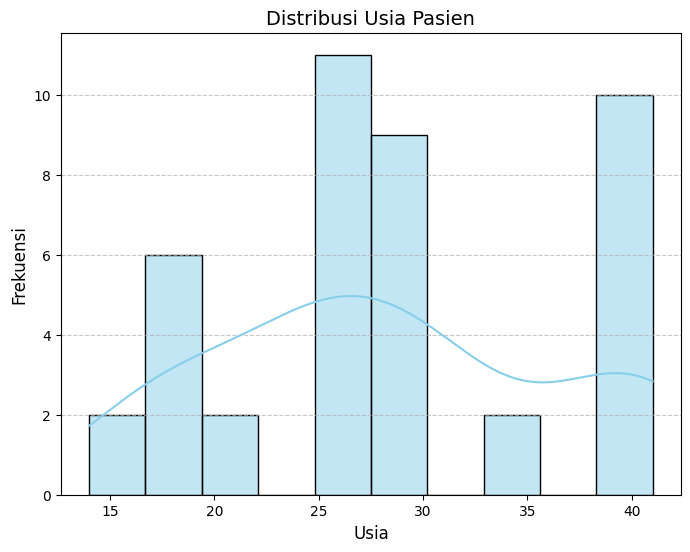

In [ ]:
# Visualisasi 1: Distribusi Usia
import matplotlib.pyplot as plt # Import the library here
plt.figure(figsize=(8, 6))
sns.histplot(data['Usia'], bins=10, kde=True, color='skyblue')
plt.title('Distribusi Usia Pasien', fontsize=14)
plt.xlabel('Usia', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

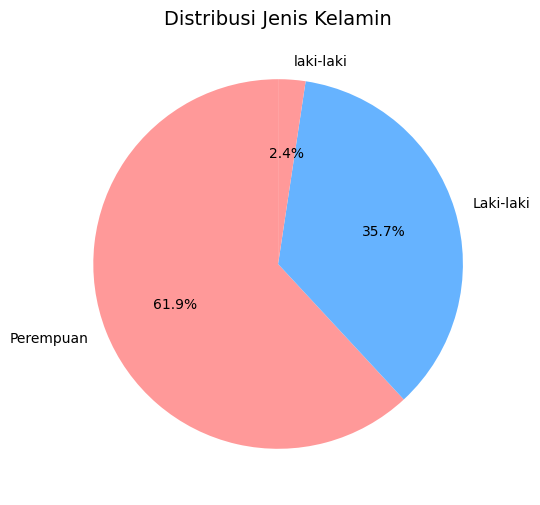

In [ ]:
# Visualisasi 2: Distribusi Jenis Kelamin
plt.figure(figsize=(6, 6))
data['Jenis Kelamin'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Distribusi Jenis Kelamin', fontsize=14)
plt.ylabel('')
plt.show()

<ipython-input-9-8dd6b2f4f949>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Jenis Kelamin', y='Durasi Gejala', data=data, palette='pastel')


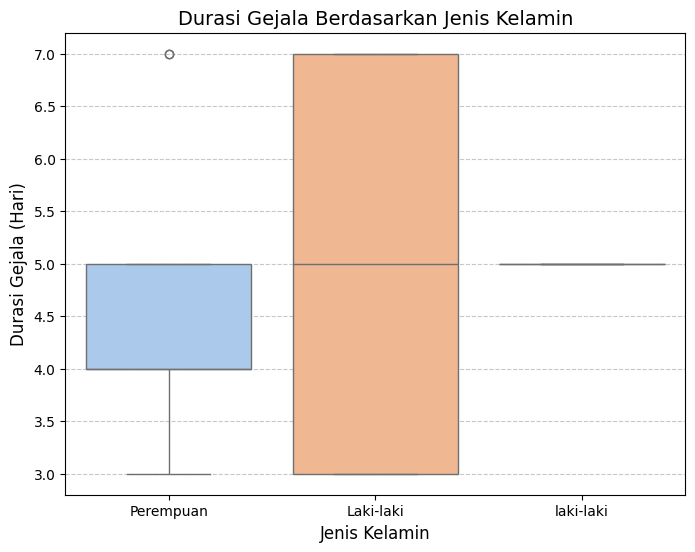

In [ ]:
# Visualisasi 3: Durasi gejala berdasarkan Jenis Kelamin
if 'Durasi Gejala' in data.columns and 'Jenis Kelamin' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Jenis Kelamin', y='Durasi Gejala', data=data, palette='pastel')
    plt.title('Durasi Gejala Berdasarkan Jenis Kelamin', fontsize=14)
    plt.xlabel('Jenis Kelamin', fontsize=12)
    plt.ylabel('Durasi Gejala (Hari)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

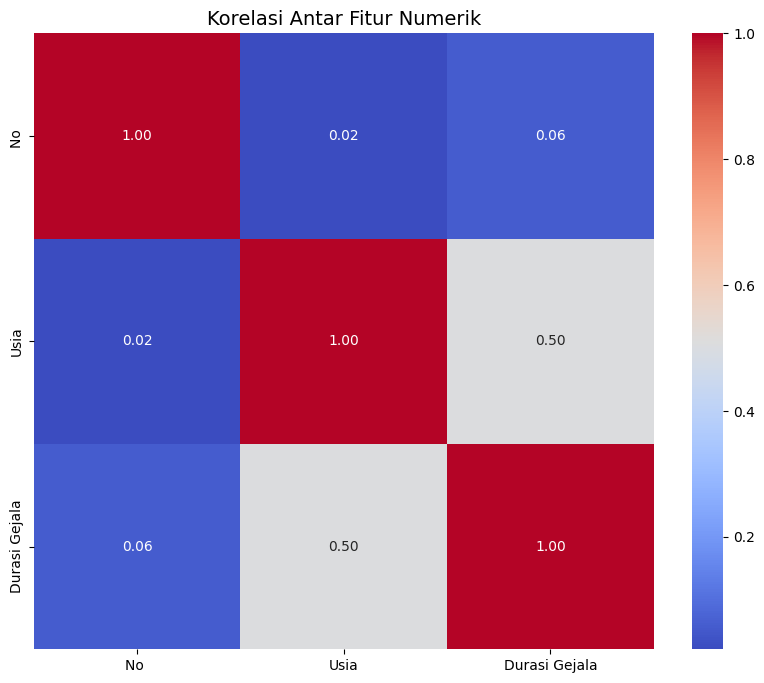

In [ ]:
# Visualisasi 4: Korelasi antar fitur numerik
numerical_columns = data.select_dtypes(include=['number'])
if numerical_columns.shape[1] > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Korelasi Antar Fitur Numerik', fontsize=14)
    plt.show()

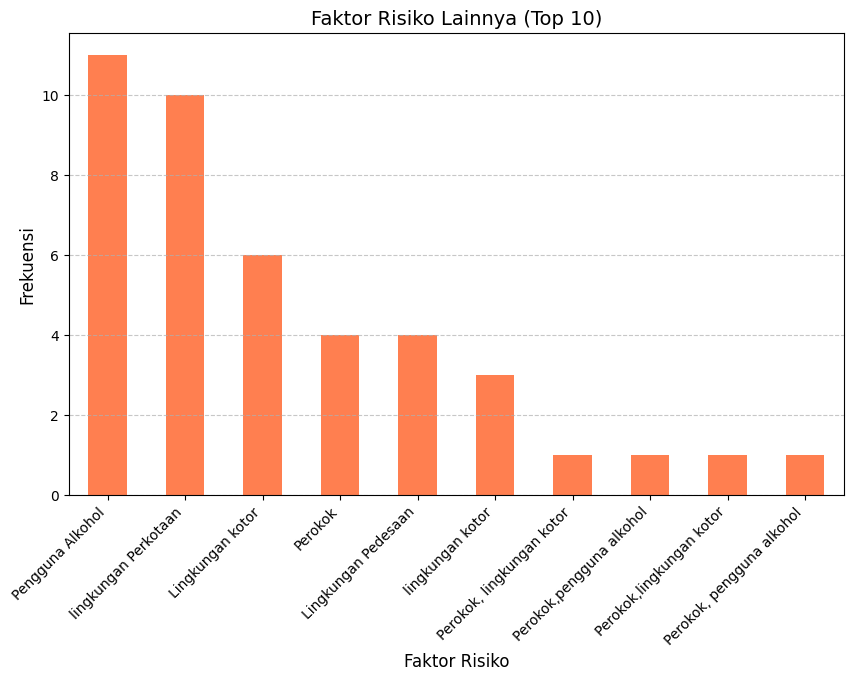

In [ ]:
# Visualisasi 5: Faktor Risiko Lainnya
if 'Faktor Risiko Lainnya' in data.columns:
    plt.figure(figsize=(10, 6))
    data['Faktor Risiko Lainnya'].value_counts().head(10).plot(kind='bar', color='coral')
    plt.title('Faktor Risiko Lainnya (Top 10)', fontsize=14)
    plt.xlabel('Faktor Risiko', fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()